In [13]:
# set width = 95%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [164]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys
import sklearn

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
#     print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [43]:
# !pip install heatmapz
from heatmap import heatmap, corrplot 

# Get the data

## Attribute Description
From Kaggle
- **GRE** Graduate Record Exam Scores
- **GPA** Grade Point Average
- **Rank** It refers to the prestige of the undergraduate institution.
The variable rank takes on the values 1 through 4. Institutions with a rank of 1 have the highest prestige, while those with a rank of 4 have the lowest.
- **Admit** It is a response variable; admit/don’t admit is a binary variable where 1 indicates that student is admitted and 0 indicates that student is not admitted.
- **SES** SES refers to socioeconomic status: 1 - low, 2 - medium, 3 - high.
- **Gendermale** Gendermale (0, 1) = 0 -> Female, 1 -> Male
- **Race** Race – 1, 2, and 3 represent Hispanic, Asian, and African-American

In [24]:
ADMIT_PATH = PROJECT_ROOT_DIR
def load_admissions_data(admit_path=ADMIT_PATH):
    csv_path = os.path.join(admit_path, "College_admission.csv")
    return pd.read_csv(csv_path)

In [31]:
admissions = load_admissions_data()
admissions.columns = ["admitted","GRE","GPA","socioeconomic_rank","gender_ismale","race_group","ugrad_prestige_rank"]
admissions.head()

,admitted,GRE,GPA,socioeconomic_rank,gender_ismale,race_group,ugrad_prestige_rank
0,0,380,3.61,1,0,3,3
1,1,660,3.67,2,0,2,3
2,1,800,4.00,2,0,2,1
3,1,640,3.19,1,1,2,4
4,0,520,2.93,3,1,2,4


In [32]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   admitted             400 non-null    int64  
 1   GRE                  400 non-null    int64  
 2   GPA                  400 non-null    float64
 3   socioeconomic_rank   400 non-null    int64  
 4   gender_ismale        400 non-null    int64  
 5   race_group           400 non-null    int64  
 6   ugrad_prestige_rank  400 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 22.0 KB


In [33]:
admissions.describe()

,admitted,GRE,GPA,socioeconomic_rank,gender_ismale,race_group,ugrad_prestige_rank
count,400.000000,400.000000,400.000000,400.000000,400.000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,1.992500,0.475,1.962500,2.48500
std,0.466087,115.516536,0.380567,0.808751,0.500,0.823279,0.94446
min,0.000000,220.000000,2.260000,1.000000,0.000,1.000000,1.00000
25%,0.000000,520.000000,3.130000,1.000000,0.000,1.000000,2.00000
50%,0.000000,580.000000,3.395000,2.000000,0.000,2.000000,2.00000
75%,1.000000,660.000000,3.670000,3.000000,1.000,3.000000,3.00000
max,1.000000,800.000000,4.000000,3.000000,1.000,3.000000,4.00000


Saving figure attribute_histogram_plots


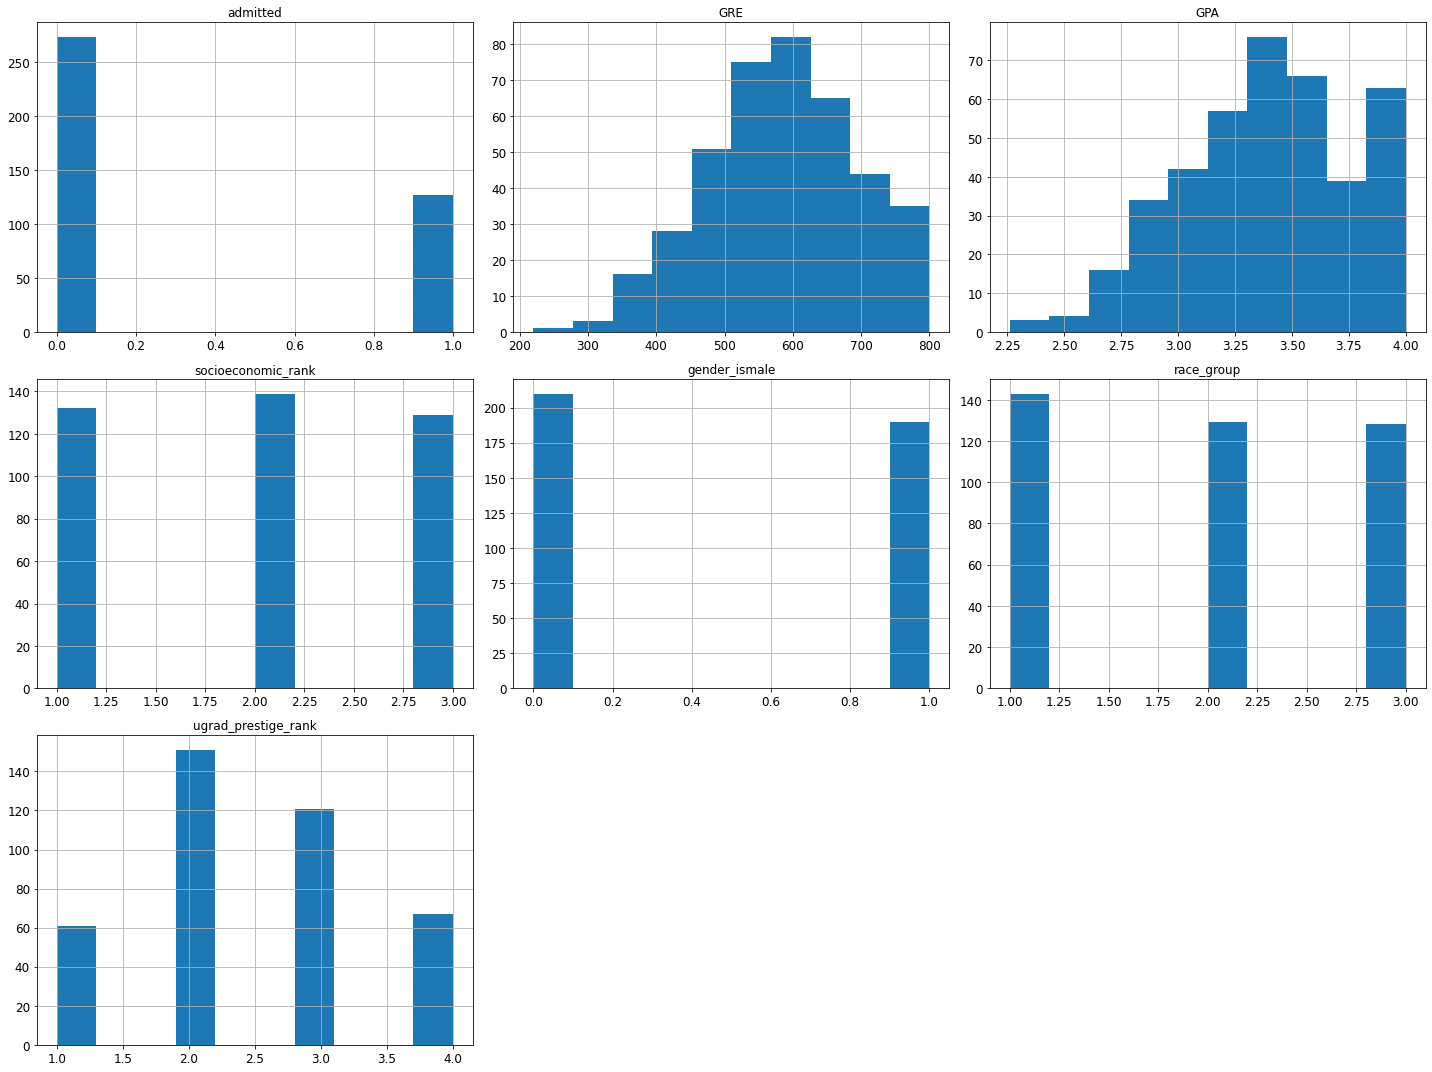

In [34]:
admissions.hist(figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

## Initial notes
- No null data; no clear n/a placeholder (zeros only appear in boolean attributes)
- variable ranges and values appear consistent with descriptions
- most attributes are discrete (e.g., no continuous school ranking)
- significant portion of GPA and GRE scores at max values

In [36]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(admissions, test_size=0.2, random_state=42)

# Deeper data exploration

In [85]:
admissions = test_set.copy()
# flip ugrad_prestige_rank to ascending
admissions["ugrad_prestige_rank"] = 5 - admissions["ugrad_prestige_rank"]
# split race into three columns
admissions["race_isHispanic"] = (admissions["race_group"]==1)
admissions["race_isAsian"] = (admissions["race_group"]==2)
admissions["race_isAA"] = (admissions["race_group"]==3)
# admitted and gender_ismale to boolean for consistency
admissions["gender_ismale"] = (admissions["gender_ismale"] == 1)
admissions["admitted"] = (admissions["admitted"] == 1)
admissions.drop("race_group", axis=1,inplace=True)
admissions.head()

,admitted,GRE,GPA,socioeconomic_rank,gender_ismale,ugrad_prestige_rank,race_isHispanic,race_isAsian,race_isAA
209,False,580,3.50,3,False,3,True,False,False
280,False,660,3.94,2,True,3,True,False,False
33,True,800,4.00,3,False,2,True,False,False
210,False,740,3.34,2,False,1,False,True,False
93,False,580,2.93,3,True,3,True,False,False


In [86]:
from pandas.plotting import scatter_matrix

attributes = admissions.columns
# scatter_matrix(admissions[attributes], figsize=(12, 8))
# save_fig("scatter_matrix_plot")
# note: no obvious gaps, but not a great visualization

In [88]:
# note: gender and race booleans not ordered, but still interpretable
ordered_attributes = admissions.columns
corrs = admissions[ordered_attributes].corr()
# hide distracting diagonals
np.fill_diagonal(corrs.values, np.nan)
# hide non-sensible race correlations (interesting if data allowed multiracial identification)
corrs.iloc[-3:,-3:] = np.nan

,admitted,GRE,GPA,socioeconomic_rank,gender_ismale,ugrad_prestige_rank,race_isHispanic,race_isAsian,race_isAA
admitted,NaN,0.246566,0.128943,0.011498,0.132175,0.143568,0.223144,-0.336573,0.093245
GRE,0.246566,NaN,0.381495,0.085629,-0.137132,0.055759,0.115841,-0.066993,-0.060794
GPA,0.128943,0.381495,NaN,-0.010417,-0.019479,0.001162,0.056284,-0.151208,0.090736
socioeconomic_rank,0.011498,0.085629,-0.010417,NaN,-0.062137,0.205261,0.273998,-0.200787,-0.100891
gender_ismale,0.132175,-0.137132,-0.019479,-0.062137,NaN,0.167968,0.176383,-0.027618,-0.167968
ugrad_prestige_rank,0.143568,0.055759,0.001162,0.205261,0.167968,NaN,-0.077594,-0.103604,0.191223
race_isHispanic,0.223144,0.115841,0.056284,0.273998,0.176383,-0.077594,NaN,NaN,NaN
race_isAsian,-0.336573,-0.066993,-0.151208,-0.200787,-0.027618,-0.103604,NaN,NaN,NaN
race_isAA,0.093245,-0.060794,0.090736,-0.100891,-0.167968,0.191223,NaN,NaN,NaN


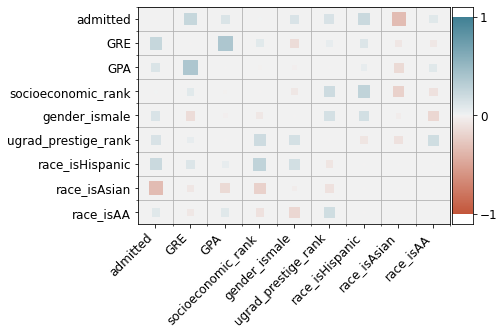

In [89]:
# size+color coded heatmaps from https://github.com/dylan-profiler/heatmaps
corrplot(corrs)
save_fig("correlation_plots")
corrs

## Correlation observations
Note: range of correlations is (-.33 to 0.38)
- admission correlates with common explicit application metrics (GPA, GRE)
- also correlated with prestige of undergrad instition, which is sometimes an explicit metric
- correlated with "being male" at similar strength to GPA
- high correlation between GPA and GRE score -- not suprising
- moderate correlation between socioeconomic and prestige -- also to be expected
- negative correlation between "being male" and GRE scores -- at least in physics applicants, I believe the opposite is true
- moderate negative correlation between "being Asian" and admission; but, also smaller (-) with application metrics

array([<AxesSubplot:title={'center':'False'}>,
       <AxesSubplot:title={'center':'True'}>], dtype=object)

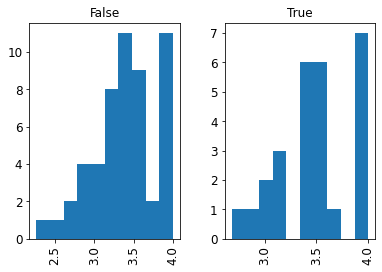

In [99]:
admissions["GPA"].hist(by=admissions["admitted"])

In [149]:
# plt.hist(admissions.loc[admissions["race_isHispanic"],"admitted"])
# plt.hist(admissions["admitted"])
admissions.columns

Index(['admitted', 'GRE', 'GPA', 'socioeconomic_rank', 'gender_ismale',
       'ugrad_prestige_rank', 'race_isHispanic', 'race_isAsian', 'race_isAA'],
      dtype='object')

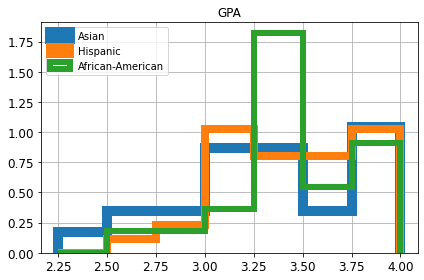

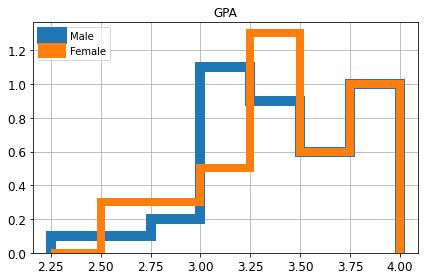

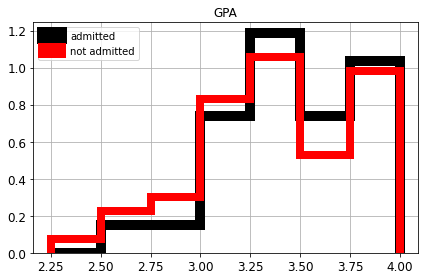

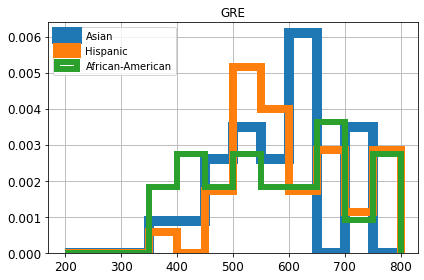

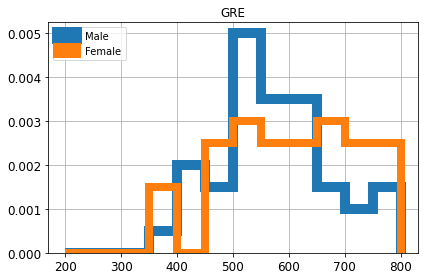

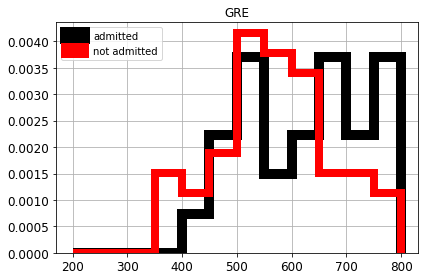

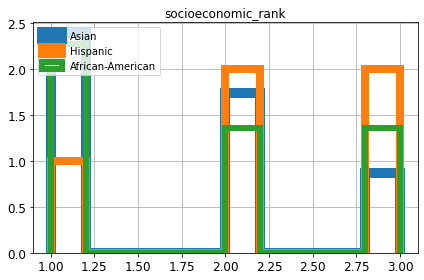

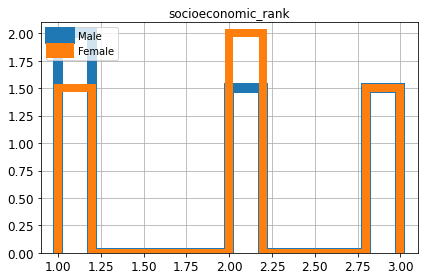

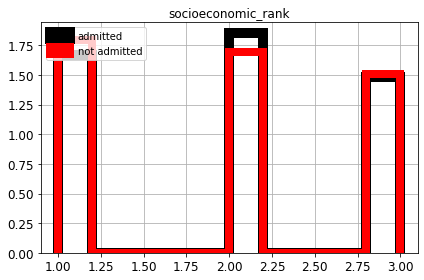

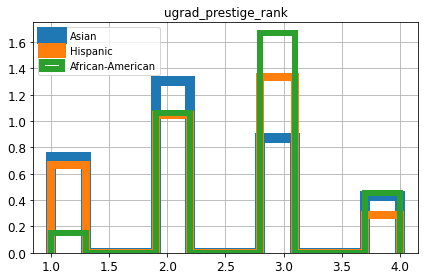

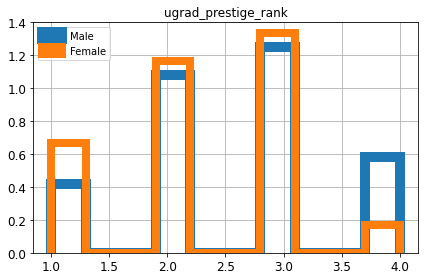

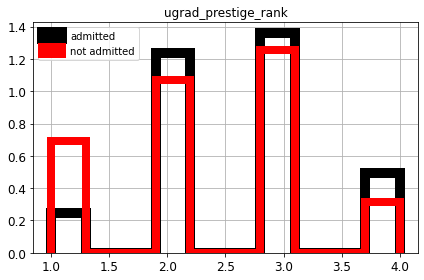

In [171]:
# ['admitted', 'GRE', 'GPA', 'socioeconomic_rank', 'gender_ismale','ugrad_prestige_rank']
GRE_bins = np.linspace(200,800,13)
GPA_bins = np.linspace(2.25,4.0,8)
attributes = ["GPA","GRE",'socioeconomic_rank','ugrad_prestige_rank']
for ind in range(0,len(attributes)):
    attribute = attributes[ind]
    if attribute == "GPA":
        bins = GPA_bins
    elif attribute == "GRE":
        bins = GRE_bins
    else:
        bins = None
    # plot by race
    admissions.loc[admissions["race_isAsian"],attribute].hist(bins=bins,histtype='step', linewidth=10,label="Asian", density = True)
    admissions.loc[admissions["race_isHispanic"],attribute].hist(bins=bins,histtype='step', linewidth=8,label="Hispanic", density = True)
    admissions.loc[admissions["race_isAA"],attribute].hist(bins=bins,histtype='step', linewidth=6,label="African-American", density = True)
    plt.legend(loc='upper left')
    plt.title(attribute)
    save_fig(attribute + "_by_race")
    plt.show()
    # plot by gender
    admissions.loc[admissions["gender_ismale"],attribute].hist(bins=bins,histtype='step', linewidth=10,label="Male", density = True)
    admissions.loc[~admissions["gender_ismale"],attribute].hist(bins=bins,histtype='step', linewidth=8,label="Female", density = True)
    plt.legend(loc='upper left')
    plt.title(attribute)
    save_fig(attribute + "_by_gender")
    plt.show()
    # plot by admitted
    admissions.loc[admissions["admitted"],attribute].hist(bins=bins,histtype='step', linewidth=10,label="admitted",color="k", density = True)
    admissions.loc[~admissions["admitted"],attribute].hist(bins=bins,histtype='step', linewidth=8,label="not admitted",color="r", density = True)
    plt.legend(loc='upper left')
    plt.title(attribute)
    save_fig(attribute + "_by_admitted")
    plt.show()

In [155]:
np.linspace(200,800,13)

array([200., 250., 300., 350., 400., 450., 500., 550., 600., 650., 700.,
       750., 800.])